In [2]:
%load_ext rpy2.ipython

In [3]:
import pandas as pd
df = pd.read_csv('Fichier_Poissons_tp5.csv',delimiter=';',decimal=',')
df.head()

longueur  poids  gonades  age  nombre_oeufs
0       420    785     74.1   12         10676
1       442    850     54.5   10          9461
2       397    655     49.6    9          8328
3       421    790     71.6    9         10281
4       464    965     69.4   11         14028

In [4]:
import seaborn as sns
print(sns.__version__)
# Avoir la version 0.11.2 de seaborn !

0.11.2


In [5]:
#Pour pouvoir afficher les graphes insérer la ligne suivante
%matplotlib inline

In [6]:
%%R -i df
library(FactoMineR)
dtf_pca <- PCA(df)

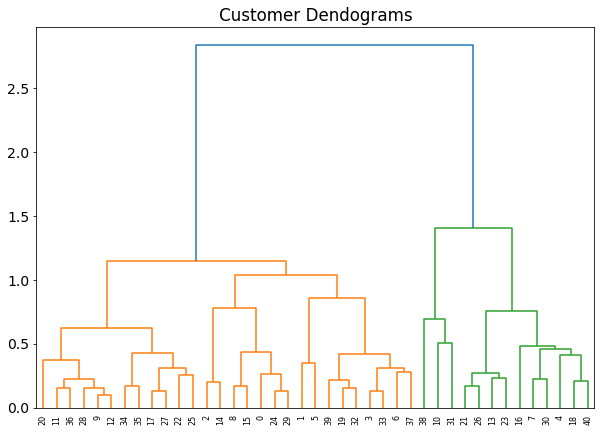

In [35]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial.distance as ssd

#Scaler df
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

#'pdist' equivalent à 'dist()' sur R 
#Cette fonction calcule et renvoie la matrice de distance entre les lignes
df_hclust=ssd.pdist(df_scaled,metric='euclidean')


plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_hclust, method='ward'))

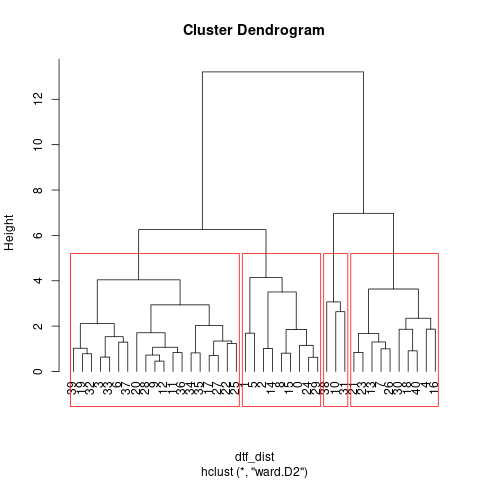

In [17]:
%%R -i df
dtf_scale <- scale(df)
dtf_dist <- dist(dtf_scale)
dtf_hclust <- hclust(dtf_dist, method = "ward.D2")
plot(dtf_hclust, hang = -1)
rect.hclust(dtf_hclust, k = 4)